<a href="https://colab.research.google.com/github/sambit-ai/codes/blob/main/Assignment_4_Instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

%matplotlib inline
import matplotlib.pyplot as plt




import random
import warnings
warnings.filterwarnings("ignore")

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

In [ ]:
y

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
X_train

array([[ 0.45267141, -1.42381257],
       [ 0.61696406, -0.00418956],
       [-1.80708012, -1.34499648],
       ...,
       [ 0.63107723, -0.4743162 ],
       [-0.47320722, -0.6387028 ],
       [ 1.07909424, -1.67541279]])

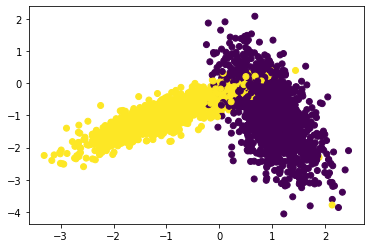

In [ ]:

colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [ ]:
from google.colab import files


def randomly_select_hyperparameter(param_range):
  return np.sort(random.sample(range(param_range[0],param_range[1]),10))

def kfold_split(x,y,folds):
  
  data = pd.DataFrame(data = x, columns=['x1','x2'])
  
  data['output'] = y
  print(data.head())
  data = data.sample(frac=1,random_state=21).reset_index(drop=True)
  kfold = model_selection.StratifiedKFold(n_splits=folds)
  for fld, (trn_,val_) in enumerate(kfold.split(X=data, y = data.output)):
    data.loc[val_, 'kfold'] = fld
  #data.to_csv("data.csv",index=False)
  #files.download('data.csv')
  return data

def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
  trainscores=[]
  testscores=[]
  data_kf = kfold_split(x_train,y_train,folds)
  print(data_kf.kfold.unique())
  neighbours = randomly_select_hyperparameter(param_range)
  print(neighbours)
  for k in tqdm(neighbours):
    trainscores_folds = []
    testscores_folds = []
    for j in range(0,folds):
      print("j is",j)
      train_data = data_kf[data_kf['kfold'] != j]
      #print(train_data.head(), )
      test_data = data_kf[data_kf['kfold']==j]
      #print(test_data.head())
      print("k is {} j is {} shape of train is {} shape of test is {}".format(k,j,train_data.shape,test_data.shape))

      X_train = train_data[["x1","x2"]]
      Y_train = train_data[["output"]]
      X_test  = test_data[["x1","x2"]]
      Y_test  = test_data[["output"]]

      #print(Y_test.head())

      classifier.n_neighbours=k
      classifier.fit(X_train,Y_train)

      #print(Y_train['output'].unique())

      Y_predicted = classifier.predict(X_train)
      trainscores_folds.append(accuracy_score(Y_train,Y_predicted))

      Y_predicted = classifier.predict(X_test)
      print("accuracy score of test",accuracy_score(Y_test,Y_predicted))
      testscores_folds.append(accuracy_score(Y_test,Y_predicted))
    trainscores.append(np.mean(np.array(trainscores_folds)))
    testscores.append(np.mean(np.array(testscores_folds)))
  return trainscores, testscores, neighbours

  0%|          | 0/10 [00:00<?, ?it/s]

         x1        x2  output
0  0.452671 -1.423813       0
1  0.616964 -0.004190       0
2 -1.807080 -1.344996       1
3 -0.325957 -0.394067       1
4 -0.400938 -0.414505       1
[0. 1. 2.]
[ 2  5  7  8 10 13 15 16 17 19]
j is 0
k is 2 j is 0 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9548
j is 1
k is 2 j is 1 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9488
j is 2
k is 2 j is 2 shape of train is (5000, 4) shape of test is (2500, 4)


 10%|█         | 1/10 [00:00<00:06,  1.37it/s]

accuracy score of test 0.9468
j is 0
k is 5 j is 0 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9548
j is 1
k is 5 j is 1 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9488
j is 2
k is 5 j is 2 shape of train is (5000, 4) shape of test is (2500, 4)


 20%|██        | 2/10 [00:01<00:05,  1.40it/s]

accuracy score of test 0.9468
j is 0
k is 7 j is 0 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9548
j is 1
k is 7 j is 1 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9488
j is 2
k is 7 j is 2 shape of train is (5000, 4) shape of test is (2500, 4)


 30%|███       | 3/10 [00:02<00:05,  1.40it/s]

accuracy score of test 0.9468
j is 0
k is 8 j is 0 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9548
j is 1
k is 8 j is 1 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9488
j is 2
k is 8 j is 2 shape of train is (5000, 4) shape of test is (2500, 4)


 40%|████      | 4/10 [00:02<00:04,  1.39it/s]

accuracy score of test 0.9468
j is 0
k is 10 j is 0 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9548
j is 1
k is 10 j is 1 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9488
j is 2
k is 10 j is 2 shape of train is (5000, 4) shape of test is (2500, 4)


 50%|█████     | 5/10 [00:03<00:03,  1.40it/s]

accuracy score of test 0.9468
j is 0
k is 13 j is 0 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9548
j is 1
k is 13 j is 1 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9488
j is 2
k is 13 j is 2 shape of train is (5000, 4) shape of test is (2500, 4)


 60%|██████    | 6/10 [00:04<00:02,  1.40it/s]

accuracy score of test 0.9468
j is 0
k is 15 j is 0 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9548
j is 1
k is 15 j is 1 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9488
j is 2
k is 15 j is 2 shape of train is (5000, 4) shape of test is (2500, 4)


 70%|███████   | 7/10 [00:04<00:02,  1.41it/s]

accuracy score of test 0.9468
j is 0
k is 16 j is 0 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9548
j is 1
k is 16 j is 1 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9488
j is 2
k is 16 j is 2 shape of train is (5000, 4) shape of test is (2500, 4)


 80%|████████  | 8/10 [00:05<00:01,  1.43it/s]

accuracy score of test 0.9468
j is 0
k is 17 j is 0 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9548
j is 1
k is 17 j is 1 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9488
j is 2
k is 17 j is 2 shape of train is (5000, 4) shape of test is (2500, 4)


 90%|█████████ | 9/10 [00:06<00:00,  1.44it/s]

accuracy score of test 0.9468
j is 0
k is 19 j is 0 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9548
j is 1
k is 19 j is 1 shape of train is (5000, 4) shape of test is (2500, 4)
accuracy score of test 0.9488
j is 2
k is 19 j is 2 shape of train is (5000, 4) shape of test is (2500, 4)


100%|██████████| 10/10 [00:06<00:00,  1.43it/s]

accuracy score of test 0.9468
[ 2  5  7  8 10 13 15 16 17 19] [0.9623333333333335, 0.9623333333333335, 0.9623333333333335, 0.9623333333333335, 0.9623333333333335, 0.9623333333333335, 0.9623333333333335, 0.9623333333333335, 0.9623333333333335, 0.9623333333333335] [0.9501333333333334, 0.9501333333333334, 0.9501333333333334, 0.9501333333333334, 0.9501333333333334, 0.9501333333333334, 0.9501333333333334, 0.9501333333333334, 0.9501333333333334, 0.9501333333333334]


[]

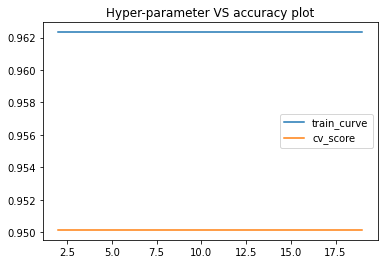

In [ ]:

neigh = KNeighborsClassifier()

params = (1,20)
folds = 3

trainscores,cv_scores, neighbours = RandomSearchCV(X_train, y_train, neigh, params, folds)
print(neighbours, trainscores, cv_scores)
plt.plot(neighbours, trainscores, label="train_curve")
plt.plot(neighbours, cv_scores, label = "cv_score" )
plt.title("Hyper-parameter VS accuracy plot")
plt.legend()
plt.plot()
 